## Abstract 
This analysis explores the performance trends of football clubs in derbies over different seasons.<br>
The objective is to identify patterns and changes in performance metrics such as goals scored,<br>
goals conceded and points accumulated.<br>
The methodology involves aggregating game results by season and computing performance metrics for<br>
each club participating in derbies. Key metrics include average points per derby, goals scored and<br>
conceded.<br>
Points award system is commonly used in soccer context to determine the<br>
rankings and standings of clubs in a league. Here’s a breakdown of how points are typically used and<br>
what they signify:<br>

### Points System
* <b>Win:</b> A club earns 3 points for winning a match.
* <b>Draw:</b> Both clubs earn 1 point each for a draw.
* <b>Loss:</b> A club earns 0 points for losing a match.

<br><b>Approach:</b> Aggregate game results by season.<br>
Calculate performance metrics for clubs (e.g., points per derby, goals scored, goals conceded).<br>
Plot these metrics over time to identify trends and significant changes.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import string
plt.style.use('ggplot')

### IMPORT CSV

In [205]:
df_games = pd.read_csv('AssignmentData/games.csv')
pd.set_option('display.max_columns', None) # Display all columns

### Data Cleaning for df_games

In [206]:
df_games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [207]:
df_games = df_games[
['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_name',
       'away_club_name', 'aggregate', 'competition_type']
]

In [228]:
df_games.head(2)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_name,away_club_name,aggregate,competition_type,home_points,away_points
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,3,0
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,0,3


### Calculate points per match
<b>calculate_points</b> function determines the points awarded to home and away teams (3 for a win, 0 for a loss, and 1 each for a draw). 

In [209]:
# Calculate the points for home and away teams based on the goals scored in each match.
def calculate_points(row):
    if row['home_club_goals'] > row['away_club_goals']:
        return (3, 0)  # Home win
    elif row['home_club_goals'] < row['away_club_goals']:
        return (0, 3)  # Away win
    else:
        return (1, 1)  # Draw

# Apply the function and assign the result to new columns 
df_games[['home_points', 'away_points']] = df_games.apply(calculate_points, axis=1, result_type='expand') # apply function applies calculate_points function to each row in df_games DataFrame.
df_games.head(2)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_name,away_club_name,aggregate,competition_type,home_points,away_points
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,3,0
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,0,3


### Aggregate Game Results by Season
Aggregate game results to calculate performance metrics for clubs by season.

In [210]:
# Aggregate game results by season and club
season_club_metrics = df_games.groupby(['season', 'home_club_id']).agg({
    'home_club_goals': 'sum',
    'away_club_goals': 'sum',
    'home_points': 'sum'
}).reset_index()

# Rename columns to reflect home club metrics
season_club_metrics.rename(columns={
    'home_club_id': 'club_id',
    'home_club_goals': 'goals_scored',
    'away_club_goals': 'goals_conceded',
    'home_points': 'points'
}, inplace=True)

# Aggregate game results for away clubs and append to season_club_metrics
away_club_metrics = df_games.groupby(['season', 'away_club_id']).agg({
    'away_club_goals': 'sum',
    'home_club_goals': 'sum',
    'away_points': 'sum'
}).reset_index()

# Rename columns to reflect away club metrics
away_club_metrics.rename(columns={
    'away_club_id': 'club_id',
    'away_club_goals': 'goals_scored',
    'home_club_goals': 'goals_conceded',
    'away_points': 'points'
}, inplace=True)

# Concatenate home and away club metrics
season_club_metrics = pd.concat([season_club_metrics, away_club_metrics], ignore_index=True)

# Group by season and club_id to aggregate results for each club
season_club_metrics = season_club_metrics.groupby(['season', 'club_id']).agg({
    'goals_scored': 'sum',
    'goals_conceded': 'sum',
    'points': 'sum'
}).reset_index()

season_club_metrics[season_club_metrics['points'].isna()]

,season,club_id,goals_scored,goals_conceded,points


In [211]:
season_club_metrics

,season,club_id,goals_scored,goals_conceded,points
0,2012,1,0,5,0
1,2012,2,3,5,3
2,2012,3,7,6,6
3,2012,4,41,50,44
4,2012,5,80,51,86
...,...,...,...,...,...
12777,2023,112751,2,13,3
12778,2023,112752,1,2,0
12779,2023,112753,3,11,3
12780,2023,112754,1,3,0


### Plotting Performance Metrics Over Time (global view)
Plot performance metrics, such as goals scored, over different seasons to identify trends and changes in derby performances.

/home/matthows/Pkgs/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthows/Pkgs/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


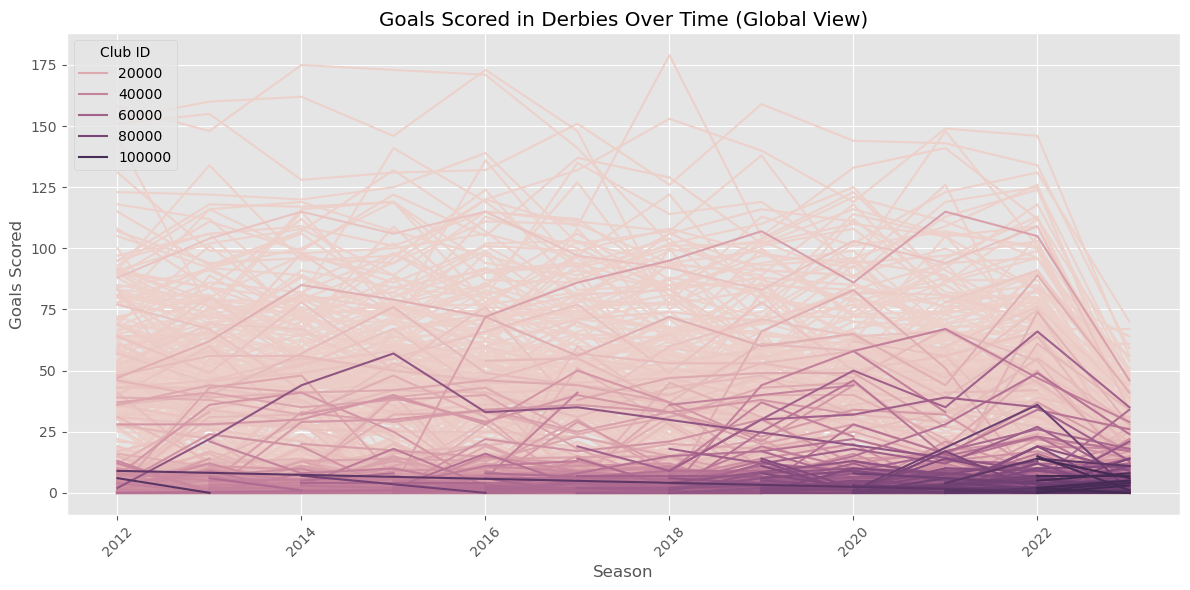

In [212]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='goals_scored', hue='club_id', data=season_club_metrics)
plt.title('Goals Scored in Derbies Over Time (Global View)')
plt.xlabel('Season')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.legend(title='Club ID', loc='upper left')
plt.tight_layout()
plt.show()

### Select the club with the highest fluctuation in goals scored over time for a more insightful graph visualization.
Calculate a measure of variability or fluctuation for each club's goals scored across different seasons.
The measure of variability which we used for this analysis was the standard deviation.

1. <b>Calculate Goals Scored Across Seasons:</b> First, aggregate the goals scored data for each club across different seasons.
2. <b>Calculate Variability:</b> Compute the standard deviation of goals scored for each club. The standard deviation measures<br>
how spread out the values (goals scored) are around the mean, providing a measure of variability or fluctuation.
3. <b>Identify the Club with the Highest Standard Deviation:</b> The club with the highest standard deviation in goals scored<br>
over time will indicate the most fluctuation in performance.

In [213]:
# Calculate goals scored per season and club for home clubs
home_goals_scored = df_games.groupby(['season', 'home_club_id', 'home_club_name'])['home_club_goals'].sum().reset_index()
home_goals_scored = home_goals_scored.rename(columns={'home_club_name': 'club_name', 'home_club_id': 'club_id','home_club_goals': 'home_goals_scored'})

# Calculate goals scored per season and club for away clubs
away_goals_scored = df_games.groupby(['season', 'away_club_id', 'away_club_name'])['away_club_goals'].sum().reset_index()
away_goals_scored = away_goals_scored.rename(columns={'away_club_name': 'club_name', 'away_club_id': 'club_id','away_club_goals': 'away_goals_scored'})

# Combine home and away goals scored into a single DataFrame
combined_goals_scored = pd.merge(home_goals_scored, away_goals_scored, on=['season', 'club_id', 'club_name'], how='outer').fillna(0)

# Keep only relevant columns
combined_goals_scored = combined_goals_scored[['season', 'club_id', 'club_name']]
combined_goals_scored

# Ensure season_club_metrics has 'season', 'club_id', 'goals_scored', 'goals_conceded', 'points' columns
# Merge with season_club_metrics
season_club_metrics = pd.merge(season_club_metrics, combined_goals_scored, on=['season', 'club_id'], how='outer').fillna(np.nan)

# Remove rows with NaN in the 'club_name' column
season_club_metrics = season_club_metrics.dropna(subset=['club_name'])

In [214]:
season_club_metrics

,season,club_id,goals_scored,goals_conceded,points,club_name
2,2012,3,7,6,6,1. Fußball-Club Köln
3,2012,4,41,50,44,1.FC Nuremberg
4,2012,5,80,51,86,Associazione Calcio Milan
8,2012,10,5,4,3,Arminia Bielefeld
9,2012,11,91,53,93,Arsenal Football Club
...,...,...,...,...,...,...
12663,2023,60949,13,22,13,Neos Podosferikos Syllogos Volou
12665,2023,61825,6,25,6,FK Minaj
12668,2023,63007,14,18,17,LNZ Cherkasy
12683,2023,68608,4,7,3,CF Os Belenenses


In [225]:
# Calculate standard deviation (fluctuation) of goals scored per club
std_dev_scored_goals = season_club_metrics.groupby(['club_id','club_name'])['goals_scored'].std().reset_index().copy()
std_dev_scored_goals = std_dev_scored_goals.rename(columns={'goals_scored': 'fluctuation'})

# Find the club with the highest fluctuation of goals scored
most_fluctuating = std_dev_scored_goals.loc[std_dev_scored_goals['fluctuation'].idxmax()]
print('Club with the highest fluctuation of goals scored:\n')
most_fluctuating

Club with the highest fluctuation of goals scored:



club_id                         23826
club_name      RasenBallsport Leipzig
fluctuation                 44.551706
Name: 399, dtype: object

### Goals Scored per Season

/home/matthows/Pkgs/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthows/Pkgs/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


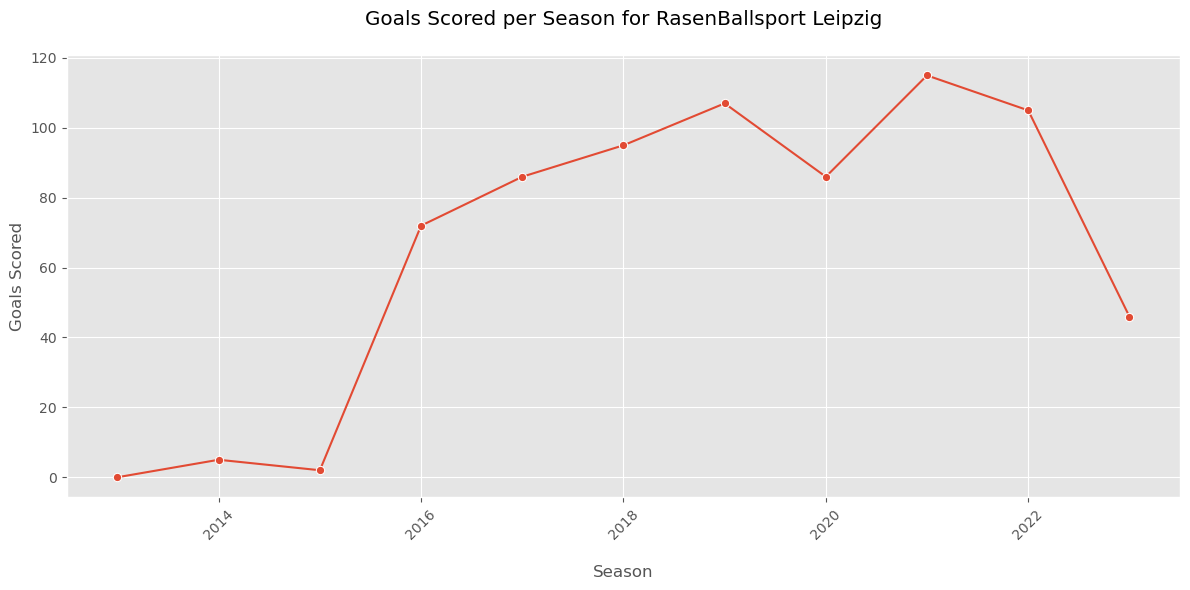

,season,club_id,goals_scored,goals_conceded,points,club_name
1919,2013,23826,0,2,0,RasenBallsport Leipzig
2918,2014,23826,5,4,6,RasenBallsport Leipzig
3910,2015,23826,2,3,3,RasenBallsport Leipzig
4894,2016,23826,72,46,67,RasenBallsport Leipzig
5890,2017,23826,86,80,73,RasenBallsport Leipzig
6888,2018,23826,95,48,100,RasenBallsport Leipzig
8002,2019,23826,107,55,92,RasenBallsport Leipzig
9092,2020,23826,86,53,92,RasenBallsport Leipzig
10218,2021,23826,115,62,94,RasenBallsport Leipzig
11356,2022,23826,105,65,97,RasenBallsport Leipzig


In [216]:
most_fluctuating_club_name = most_fluctuating.club_name # RasenBallsport Leipzig
most_fluctuating_club_id = most_fluctuating.club_id # 23826

# Filter data for the specific club (both home and away matches)
filtered_data = season_club_metrics[season_club_metrics['club_id'] == most_fluctuating_club_id]

# Plotting goals scored per season
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='goals_scored', data=filtered_data, marker='o')
plt.title(f'Goals Scored per Season for {most_fluctuating_club_name}\n')
plt.xlabel('\nSeason')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

filtered_data

### Select the club with the highest fluctuation in goals conceded over time for a more insightful graph visualization.
Calculate a measure of variability or fluctuation for each club's goals conceded across different seasons.
The measure of variability which we used for this analysis was the standard deviation.

1. <b>Calculate Variability:</b> Compute the standard deviation of goals conceded for each club. The standard deviation measures<br>
how spread out the values (goals conceded) are around the mean, providing a measure of variability or fluctuation.
2. <b>Identify the Club with the Highest Standard Deviation:</b> The club with the highest standard deviation in goals conceded<br>
over time will indicate the most fluctuation in performance.

In [217]:
# Calculate standard deviation (fluctuation) of goals scored per club
std_dev_scored_goals = season_club_metrics.groupby(['club_id','club_name'])['goals_conceded'].std().reset_index().copy()
std_dev_scored_goals = std_dev_scored_goals.rename(columns={'goals_conceded': 'fluctuation'})

# Find the club with the highest overall fluctuation for home clubs
most_fluctuating = std_dev_scored_goals.loc[std_dev_scored_goals['fluctuation'].idxmax()]
most_fluctuating

club_id                1123
club_name      Norwich City
fluctuation       38.554468
Name: 210, dtype: object

### Goals Conceded per Season

/home/matthows/Pkgs/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthows/Pkgs/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


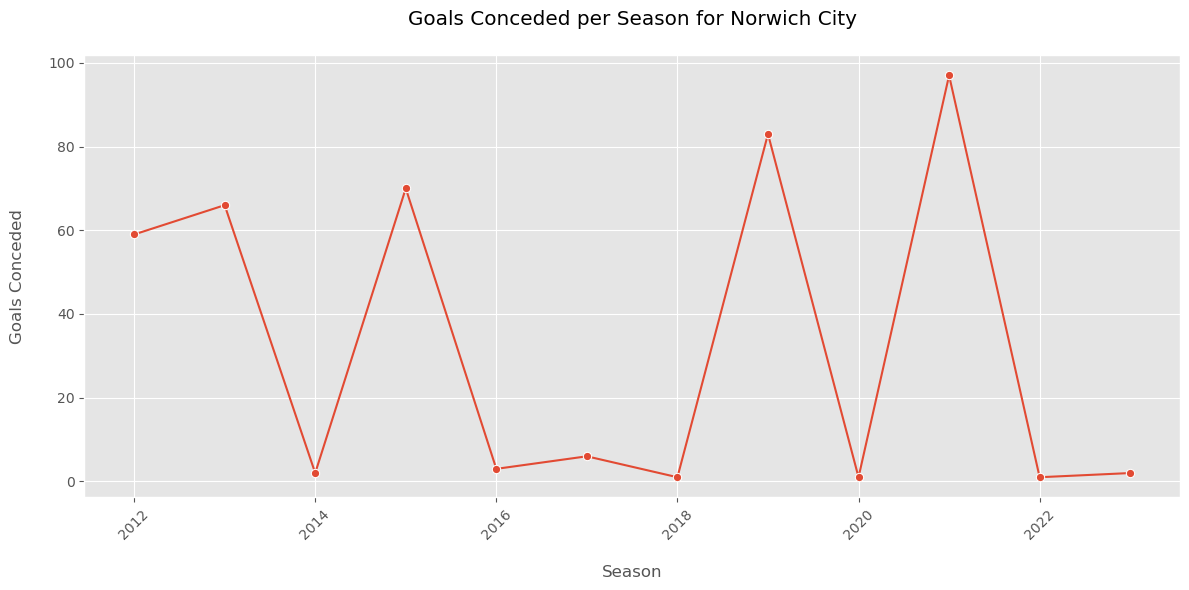

,season,club_id,goals_scored,goals_conceded,points,club_name
314,2012,1123,44,59,47,Norwich City
1319,2013,1123,29,66,34,Norwich City
2331,2014,1123,0,2,0,Norwich City
3338,2015,1123,39,70,34,Norwich City
4332,2016,1123,2,3,1,Norwich City
5334,2017,1123,4,6,1,Norwich City
6343,2018,1123,0,1,0,Norwich City
7410,2019,1123,37,83,30,Norwich City
8539,2020,1123,2,1,3,Norwich City
9642,2021,1123,37,97,31,Norwich City


In [218]:
most_fluctuating_club_name = most_fluctuating.club_name # Norwich City
most_fluctuating_club_id = most_fluctuating.club_id # 1123

# Filter data for the specific club (both home and away matches)
filtered_data = season_club_metrics[season_club_metrics['club_id'] == most_fluctuating_club_id]

# Plotting goals scored per season
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='goals_conceded', data=filtered_data, marker='o')
plt.title(f'Goals Conceded per Season for {most_fluctuating_club_name}\n')
plt.xlabel('\nSeason')
plt.ylabel('Goals Conceded\n')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

filtered_data

In [226]:
most_fluctuating_club_id

124

### Select the club with the most points accumulated over time for a more insightful graph visualization.
Calculate a measure of variability or fluctuation for each club's goals conceded across different seasons.
The measure of variability which we used for this analysis was the standard deviation.

1. <b>Calculate Variability:</b> Compute the standard deviation of points accumulated for each club. The standard deviation measures<br>
how spread out the values (goals conceded) are around the mean, providing a measure of variability or fluctuation.
2. <b>Identify the Club with the Highest Standard Deviation:</b> The club with the highest standard deviation in points<br>
over time will indicate the most fluctuation in performance.

In [219]:
# Calculate standard deviation (fluctuation) of goals scored per club
std_dev_scored_goals = season_club_metrics.groupby(['club_id','club_name'])['points'].std().reset_index().copy()
std_dev_scored_goals = std_dev_scored_goals.rename(columns={'points': 'fluctuation'})

# Find the club with the highest overall fluctuation for home clubs
most_fluctuating = std_dev_scored_goals.loc[std_dev_scored_goals['fluctuation'].idxmax()]
most_fluctuating

club_id                          124
club_name      Rangers Football Club
fluctuation                45.374118
Name: 40, dtype: object

### Points accumulated per Season

/home/matthows/Pkgs/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthows/Pkgs/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


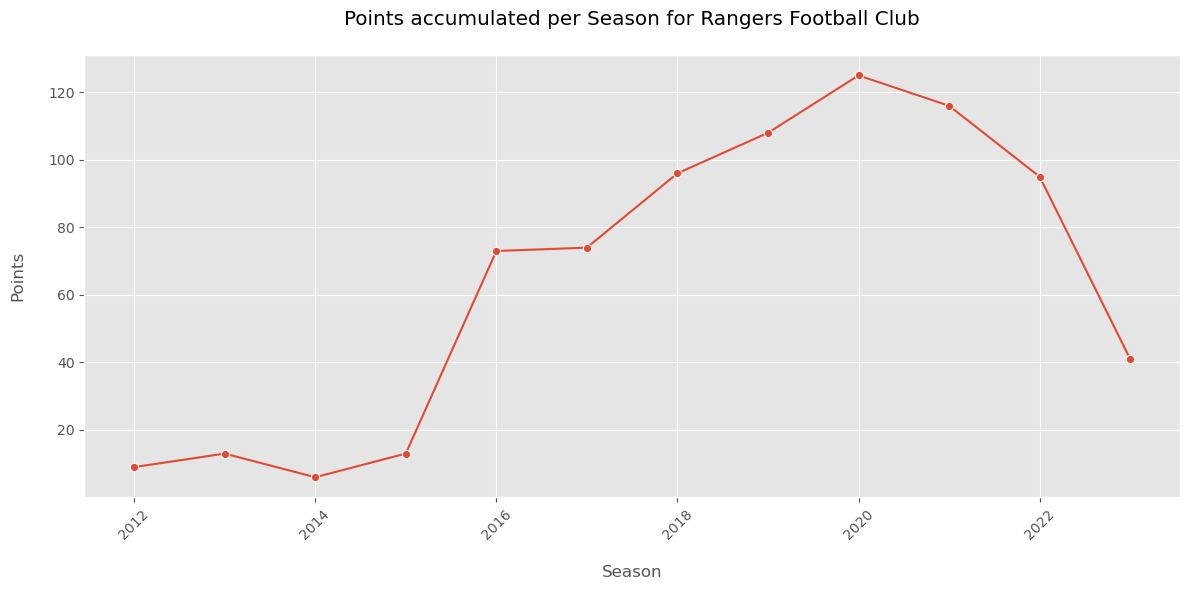

,season,club_id,goals_scored,goals_conceded,points,club_name
67,2012,124,11,3,9,Rangers Football Club
1064,2013,124,13,4,13,Rangers Football Club
2078,2014,124,5,2,6,Rangers Football Club
3090,2015,124,20,11,13,Rangers Football Club
4084,2016,124,63,48,73,Rangers Football Club
5088,2017,124,81,46,74,Rangers Football Club
6097,2018,124,99,39,96,Rangers Football Club
7159,2019,124,103,36,108,Rangers Football Club
8301,2020,124,121,31,125,Rangers Football Club
9394,2021,124,111,53,116,Rangers Football Club


In [220]:
most_fluctuating_club_name = most_fluctuating.club_name # Rangers Football Club
most_fluctuating_club_id = most_fluctuating.club_id # 124

# Filter data for the specific club (both home and away matches)
filtered_data = season_club_metrics[season_club_metrics['club_id'] == most_fluctuating_club_id]

# Plotting goals scored per season
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='points', data=filtered_data, marker='o')
plt.title(f'Points accumulated per Season for {most_fluctuating_club_name}\n')
plt.xlabel('\nSeason')
plt.ylabel('Points\n')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

filtered_data